In [1]:
import numpy as np
import matplotlib.pyplot as plt

masses = {}
list_pdg = [211,-211,111,321,-321,2212,-2212,3122,-3122]
list_mass = [0.14,0.14,0.135,0.494,0.494,0.9383,0.9383,1.11568,1.11568]

for k,v in zip(list_pdg,list_mass):
    masses[k]=v

import os



def labeling_barocco(name):
    params = {}
    params['grid'] = name[6:9]  # int(name[6:9])
    params['Rg'] = name[11:14]  # float(name[11:14])
    params['alphamix'] = name[22:26]  # float(name[22:26])
    params['system'] = name[32:36]  # int(name[32:36])
    params['centrality'] = name[46:51]  # name[46:51]
    params['etaS'] = name[55:59]  # float(name[55:59])
    params['ecrit'] = name[64:67]  # float(name[64:67])
    
    return params

def load_plot_data(list_dir,data_type="yspectra.txt"):
    plot_data = {}
    list_dir2 = [l+data_type for l in list_dir]
    for k, dir in enumerate(list_dir2):
        plot_data[k] = {'dir': dir, 'params': labeling_barocco(dir), 'data': np.loadtxt(dir)}
    
    return plot_data


In [2]:
data_folder = "./flows2018"
file = "Table4.csv"
test = np.genfromtxt(data_folder+"/"+file, skip_header=13,delimiter=',')
# simul = np.loadtxt("v2.txt",unpack=True)

pt_flow = test[:,0]
v2 = test[:,3]
Dv = np.sqrt(test[:,4]**2+test[:,6 ]**2)

data_folder = "./flows2022"
file = "Table11.csv"
test = np.genfromtxt(data_folder+"/"+file, skip_header=10,delimiter=',')
# simul = np.loadtxt("v2.txt",unpack=True)

pt_flow2022 = test[:,0]
v22022 = test[:,1]
Dv2022 = np.sqrt(test[:,2]**2+test[:,4 ]**2)

<ErrorbarContainer object of 3 artists>

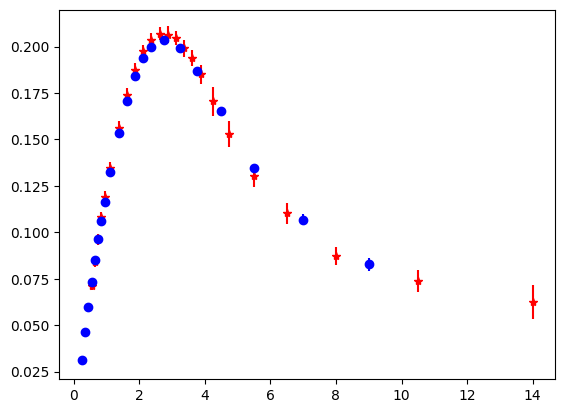

In [6]:
plt.errorbar(pt_flow,v2,yerr=Dv,fmt='r*')
plt.errorbar(pt_flow2022,v22022,yerr=Dv2022,fmt='bo')
# plt.xlim(0,4.5)

In [5]:
dir_list = os.listdir("./")
plot_list_nobulk = ["./"+e+"/Plots"+"/" for e in dir_list if "zeta" in e]
plot_list_nobulk.sort()

plot_list = ["./"+e+"/Plots"+"/" for e in dir_list if "grid" in e]
plot_list.sort()


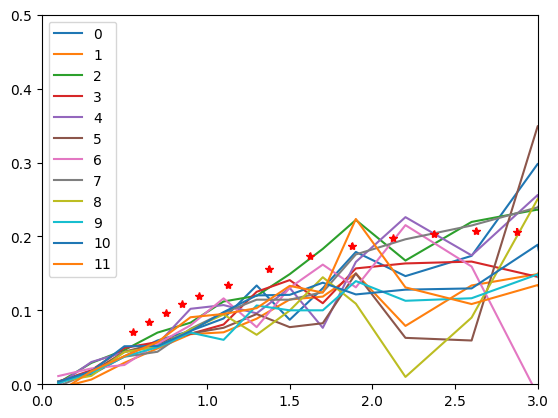

In [7]:
v2_datanobulk = load_plot_data(plot_list_nobulk,"v2spectra.txt") 

for k in range(0,len(v2_datanobulk)):
    if k!=20:
        plt.plot(v2_datanobulk[k]['data'][:,0],(v2_datanobulk[k]['data'][:,1]),label=str(k))
plt.errorbar(pt_flow,v2,yerr=Dv,fmt='r*')
plt.xlim(0,3)
plt.ylim(0,0.5)
plt.legend()
plt.show()

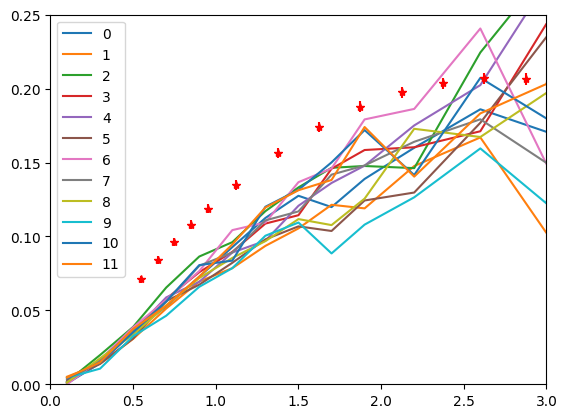

In [9]:
v2_data = load_plot_data(plot_list,"v2spectra.txt") 

for k in range(0,len(v2_data)):
    if k!=22:
        plt.plot(v2_data[k]['data'][:,0],(v2_data[k]['data'][:,1]),label=str(k))

plt.errorbar(pt_flow,v2,yerr=Dv,fmt='r*')
plt.xlim(0,3)
plt.ylim(0,0.25)
plt.legend()
plt.show()